# Weekly Project 2!

## Introduction to Road Traffic Accidents (RTA) Dataset

### Dataset Overview
The RTA Dataset provides a detailed snapshot of road traffic accidents, capturing a range of data from accident conditions to casualty details. This dataset is essential for analyzing patterns and causes of accidents to improve road safety.

### Data Characteristics
- **Entries**: The dataset contains 12,316 entries.
- **Features**: There are 32 features in the dataset, which include:
  - `Time`: Time when the accident occurred.
  - `Day_of_week`: Day of the week.
  - `Age_band_of_driver`: Age group of the driver involved.
  - `Sex_of_driver`: Gender of the driver.
  - `Educational_level`: Educational level of the driver.
  - `Type_of_vehicle`: Type of vehicle involved in the accident.
  - `Cause_of_accident`: Reported cause of the accident.
  - `Accident_severity`: Severity of the accident.
- **Target Column**: `Accident_severity` is used as the target column for modeling. This feature classifies the severity of each accident.

### Objective
Students will use this dataset to apply various data visualization, modeling, and evaluation techniques learned in class. The primary goal is to build models that can accurately predict the severity of accidents and to identify the key factors that contribute to severe accidents.

## Import Libraries
Import all the necessary libraries here. Include libraries for handling data (like pandas), visualization (like matplotlib and seaborn), and modeling (like scikit-learn).

In [91]:
import sklearn
import numpy as np
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder, LabelEncoder


## Load Data
Load the dataset from the provided CSV file into a DataFrame.

In [92]:
df = pd.read_csv("/content/RTA_Dataset.csv")
df.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


## Exploratory Data Analysis (EDA)
Perform EDA to understand the data better. This involves several steps to summarize the main characteristics, uncover patterns, and establish relationships:
* Find the dataset information and observe the datatypes.
* Check the shape of the data to understand its structure.
* View the the data with various functions to get an initial sense of the data.
* Perform summary statistics on the dataset to grasp central tendencies and variability.
* Check for duplicated data.
* Check for null values.

And apply more if needed!


In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

In [94]:
df.tail()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
12311,16:15:00,Wednesday,31-50,Male,NaN,Employee,2-5yr,Lorry (11?40Q),Owner,NaN,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12312,18:00:00,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,NaN,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12313,13:55:00,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,2-5yrs,...,Other,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,13:55:00,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,2-5yrs,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,Slight Injury
12315,13:55:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Other,Owner,2-5yrs,...,Stopping,Pedestrian,Female,5,3,Driver,Normal,Crossing from nearside - masked by parked or s...,Changing lane to the right,Slight Injury


In [95]:
df.shape

(12316, 32)

In [96]:
df["Educational_level"].unique()

array(['Above high school', 'Junior high school', nan,
       'Elementary school', 'High school', 'Unknown', 'Illiterate',
       'Writing & reading'], dtype=object)

In [97]:
df.isnull().sum()

,0
Time,0
Day_of_week,0
Age_band_of_driver,0
Sex_of_driver,0
Educational_level,741
Vehicle_driver_relation,579
Driving_experience,829
Type_of_vehicle,950
Owner_of_vehicle,482
Service_year_of_vehicle,3928


In [98]:
df.drop(index=df[df.Educational_level.isnull()].index,inplace=True)

In [99]:
df.isnull().sum()

,0
Time,0
Day_of_week,0
Age_band_of_driver,0
Sex_of_driver,0
Educational_level,0
Vehicle_driver_relation,98
Driving_experience,275
Type_of_vehicle,850
Owner_of_vehicle,407
Service_year_of_vehicle,3613


In [100]:
df.drop(index=df[df.Vehicle_driver_relation.isnull()].index,inplace=True)

In [101]:
df.isnull().sum()

,0
Time,0
Day_of_week,0
Age_band_of_driver,0
Sex_of_driver,0
Educational_level,0
Vehicle_driver_relation,0
Driving_experience,253
Type_of_vehicle,840
Owner_of_vehicle,402
Service_year_of_vehicle,3578


In [102]:

#df.dropna(subset=['Educational_level'], inplace=True)
#df.drop(df['Educational_level'].dropna().index, inplace = True)
#df.drop(index=df[df.Educational_level.isnull()].index,inplace=True)
#df['Defect_of_vehicle'].fillna(df['Defect_of_vehicle'].mode()[0], inplace=True)

In [103]:
df.shape

(11477, 32)

In [104]:
df['Vehicle_driver_relation'].unique()

array(['Employee', 'Owner', 'Other', 'Unknown'], dtype=object)

In [105]:
df["Driving_experience"].unique()

array(['1-2yr', 'Above 10yr', '5-10yr', '2-5yr', 'No Licence',
       'Below 1yr', nan, 'unknown'], dtype=object)

In [106]:
df.drop(index=df[df.Driving_experience.isnull()].index,inplace=True)

In [107]:
df["Driving_experience"].unique()

array(['1-2yr', 'Above 10yr', '5-10yr', '2-5yr', 'No Licence',
       'Below 1yr', 'unknown'], dtype=object)

In [108]:
df.isnull().sum()

,0
Time,0
Day_of_week,0
Age_band_of_driver,0
Sex_of_driver,0
Educational_level,0
Vehicle_driver_relation,0
Driving_experience,0
Type_of_vehicle,818
Owner_of_vehicle,389
Service_year_of_vehicle,3487


In [109]:


#df['Vehicle_driver_relation'].replace('nan', np.nan, inplace=True)


In [110]:
df.drop(index=df[df.Type_of_vehicle.isnull()].index,inplace=True)

In [111]:
df['Type_of_vehicle'].unique()

array(['Automobile', 'Public (> 45 seats)', 'Lorry (41?100Q)',
       'Public (13?45 seats)', 'Lorry (11?40Q)', 'Long lorry',
       'Public (12 seats)', 'Taxi', 'Pick up upto 10Q', 'Stationwagen',
       'Ridden horse', 'Other', 'Bajaj', 'Motorcycle', 'Turbo',
       'Special vehicle', 'Bicycle'], dtype=object)

In [112]:
df.isnull().sum()

,0
Time,0
Day_of_week,0
Age_band_of_driver,0
Sex_of_driver,0
Educational_level,0
Vehicle_driver_relation,0
Driving_experience,0
Type_of_vehicle,0
Owner_of_vehicle,355
Service_year_of_vehicle,3206


In [113]:
df["Owner_of_vehicle"].unique()

array(['Owner', 'Governmental', 'Organization', nan, 'Other'],
      dtype=object)

In [114]:
df.drop(index=df[df.Owner_of_vehicle.isnull()].index,inplace=True)

In [115]:
#df.drop(index=df[df.Educational_level.isnull()].index,inplace=True)
df["Owner_of_vehicle"].unique()

array(['Owner', 'Governmental', 'Organization', 'Other'], dtype=object)

In [116]:
df["Area_accident_occured"].unique()

array(['Residential areas', 'Office areas', '  Recreational areas',
       ' Industrial areas', 'Other', ' Church areas', '  Market areas',
       'Rural village areas', ' Outside rural areas', ' Hospital areas',
       nan, 'School areas', 'Recreational areas',
       'Rural village areasOffice areas'], dtype=object)

In [117]:
df.drop(index=df[df.Area_accident_occured.isnull()].index,inplace=True)

In [118]:
df["Road_allignment"].unique()

array(['Tangent road with flat terrain', nan,
       'Tangent road with mild grade and flat terrain', 'Escarpments',
       'Tangent road with rolling terrain', 'Gentle horizontal curve',
       'Tangent road with mountainous terrain and',
       'Steep grade downward with mountainous terrain',
       'Sharp reverse curve',
       'Steep grade upward with mountainous terrain'], dtype=object)

In [119]:
df.drop(index=df[df.Road_allignment.isnull()].index,inplace=True)

In [120]:
df["Road_surface_type"].unique()

array(['Asphalt roads', 'Earth roads', nan, 'Gravel roads', 'Other',
       'Asphalt roads with some distress'], dtype=object)

In [121]:
df.drop(index=df[df.Road_surface_type.isnull()].index,inplace=True)

In [122]:
df["Type_of_collision"].unique()

array(['Collision with roadside-parked vehicles',
       'Vehicle with vehicle collision', 'Collision with animals',
       'Other', 'Rollover', 'Fall from vehicles',
       'Collision with pedestrians', 'Collision with roadside objects',
       'Unknown', nan, 'With Train'], dtype=object)

In [123]:
df.drop(index=df[df.Type_of_collision.isnull()].index,inplace=True)

In [124]:
df["Vehicle_movement"].unique()

array(['Going straight', 'U-Turn', 'Turnover', 'Waiting to go',
       'Moving Backward', 'Getting off', 'Reversing', 'Unknown', 'Parked',
       'Stopping', 'Other', 'Overtaking', nan, 'Entering a junction'],
      dtype=object)

In [125]:
df.drop(index=df[df.Vehicle_movement.isnull()].index,inplace=True)

In [126]:
df.shape

(9328, 32)

In [127]:
df["Types_of_Junction"].unique()

array(['No junction', 'Y Shape', 'Crossing', 'O Shape', 'Other',
       'Unknown', 'T Shape', 'X Shape', nan], dtype=object)

In [128]:
df.drop(index=df[df.Types_of_Junction.isnull()].index,inplace=True)

In [129]:
df["Work_of_casuality"].unique()

array([nan, 'Driver', 'Other', 'Employee', 'Self-employed', 'Student',
       'Unemployed', 'Unknown'], dtype=object)

In [130]:
df["Service_year_of_vehicle"].unique()

array(['Above 10yr', '5-10yrs', nan, '1-2yr', '2-5yrs', 'Unknown',
       'Below 1yr'], dtype=object)

In [131]:
df['Defect_of_vehicle'].fillna(df['Defect_of_vehicle'].mode()[0], inplace=True)

In [132]:
df['Lanes_or_Medians'].unique()

array([nan, 'Undivided Two way', 'other', 'Double carriageway (median)',
       'One way', 'Two-way (divided with solid lines road marking)',
       'Two-way (divided with broken lines road marking)', 'Unknown'],
      dtype=object)

In [133]:
df.drop(index=df[df.Lanes_or_Medians.isnull()].index,inplace=True)

In [134]:
df["Fitness_of_casuality"].unique()

array([nan, 'Normal', 'Deaf', 'Blind', 'NormalNormal', 'Other'],
      dtype=object)

In [135]:

df.drop(columns=['Fitness_of_casuality'], inplace=True)


In [136]:
df["Defect_of_vehicle"].unique()

array(['No defect', '7', '5'], dtype=object)

In [137]:
df.drop(columns=['Defect_of_vehicle'], inplace=True)

In [138]:
df["Work_of_casuality"].unique()

array([nan, 'Driver', 'Other', 'Employee', 'Self-employed', 'Student',
       'Unemployed', 'Unknown'], dtype=object)

In [139]:
df["Work_of_casuality"].unique()

array([nan, 'Driver', 'Other', 'Employee', 'Self-employed', 'Student',
       'Unemployed', 'Unknown'], dtype=object)

In [140]:
df['Work_of_casuality'].replace(np.nan, 'Unknown', inplace=True)

In [141]:
df["Service_year_of_vehicle"].unique()

array(['5-10yrs', nan, 'Above 10yr', '1-2yr', '2-5yrs', 'Unknown',
       'Below 1yr'], dtype=object)

In [142]:
df['Service_year_of_vehicle'].replace(np.nan, 'Unknown', inplace=True)

In [143]:
df.isnull().sum()

,0
Time,0
Day_of_week,0
Age_band_of_driver,0
Sex_of_driver,0
Educational_level,0
Vehicle_driver_relation,0
Driving_experience,0
Type_of_vehicle,0
Owner_of_vehicle,0
Service_year_of_vehicle,0


## Data Preprocessing
Data preprocessing is essential for transforming raw data into a format suitable for further analysis and modeling. Follow these steps to ensure your data is ready for predictive modeling or advanced analytics:
- **Handling Missing Values**: Replace missing values with appropriate statistics (mean, median, mode) or use more complex imputation techniques.
- **Normalization/Scaling**: Scale data to a small, specified range like 0 to 1, or transform it to have a mean of zero and a standard deviation of one.
- **Label Encoding**: Convert categorical text data into model-understandable numbers where the labels are ordered.
- **One-Hot Encoding**: Use for nominal categorical data where no ordinal relationship exists to transform the data into a binary column for each category. (Be careful not to increase the dimensionality significantly)
- **Detection and Treatment of Outliers**: Use statistical tests, box plots, or scatter plots to identify outliers and then cap, trim, or use robust methods to reduce the effect of outliers, depending on the context.
- **Feature Engineering**: Enhance your dataset by creating new features and transforming existing ones. This might involve combining data from different columns, applying transformations, or reducing dimensionality with techniques like PCA to improve model performance.

Consider these steps as a foundation, and feel free to introduce additional preprocessing techniques as needed to address specific characteristics of your dataset.

In [144]:
df['Time'] = pd.to_timedelta(df['Time'])

In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8439 entries, 1 to 12315
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype          
---  ------                       --------------  -----          
 0   Time                         8439 non-null   timedelta64[ns]
 1   Day_of_week                  8439 non-null   object         
 2   Age_band_of_driver           8439 non-null   object         
 3   Sex_of_driver                8439 non-null   object         
 4   Educational_level            8439 non-null   object         
 5   Vehicle_driver_relation      8439 non-null   object         
 6   Driving_experience           8439 non-null   object         
 7   Type_of_vehicle              8439 non-null   object         
 8   Owner_of_vehicle             8439 non-null   object         
 9   Service_year_of_vehicle      8439 non-null   object         
 10  Area_accident_occured        8439 non-null   object         
 11  Lanes_or_Medians             8439 

In [146]:
df.isnull().sum()

,0
Time,0
Day_of_week,0
Age_band_of_driver,0
Sex_of_driver,0
Educational_level,0
Vehicle_driver_relation,0
Driving_experience,0
Type_of_vehicle,0
Owner_of_vehicle,0
Service_year_of_vehicle,0


In [147]:
df["Casualty_class"].unique()


array(['na', 'Pedestrian', 'Passenger', 'Driver or rider'], dtype=object)

In [148]:
df.columns

Index(['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle',
       'Area_accident_occured', 'Lanes_or_Medians', 'Road_allignment',
       'Types_of_Junction', 'Road_surface_type', 'Road_surface_conditions',
       'Light_conditions', 'Weather_conditions', 'Type_of_collision',
       'Number_of_vehicles_involved', 'Number_of_casualties',
       'Vehicle_movement', 'Casualty_class', 'Sex_of_casualty',
       'Age_band_of_casualty', 'Casualty_severity', 'Work_of_casuality',
       'Pedestrian_movement', 'Cause_of_accident', 'Accident_severity'],
      dtype='object')

In [149]:
# Initialize LabelEncoder
le = LabelEncoder()

# Label encode 'Fuel_Type' column
df['Casualty_class'] = le.fit_transform(df['Casualty_class'])
#Vehicle_movement


In [150]:
# Initialize LabelEncoder


# Label encode 'Fuel_Type' column
df['Day_of_week'] = le.fit_transform(df['Day_of_week'])
#Vehicle_movement


In [151]:
# Initialize OneHotEncoder
#ohe = OneHotEncoder(sparse_output=False)

# One-hot encode 'Name' column
#name_encoded = ohe.fit_transform(df[['Vehicle_movement']])
#name_encoded_df = pd.DataFrame(name_encoded, columns=ohe.get_feature_names_out(['Vehicle_movement']))

# Concatenate the original dataframe with the new one-hot encoded dataframes
#df_one_hot = pd.concat([df, name_encoded_df], axis=1)

# Drop original columns if not needed
#df_one_hot.drop(['Vehicle_movement'], axis=1, inplace=True)

#df = df_one_hot

In [152]:
df.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Number_of_casualties,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
1,0 days 17:02:00,1,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,2,Going straight,3,na,na,na,Unknown,Not a Pedestrian,Overtaking,Slight Injury
3,0 days 01:06:00,3,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,Unknown,...,2,Going straight,2,Female,18-30,3,Driver,Not a Pedestrian,Changing lane to the right,Slight Injury
7,0 days 17:20:00,0,18-30,Male,Junior high school,Employee,2-5yr,Automobile,Governmental,Above 10yr,...,1,U-Turn,3,na,na,na,Unknown,Not a Pedestrian,No priority to vehicle,Slight Injury
8,0 days 17:20:00,0,18-30,Male,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,1-2yr,...,1,Going straight,2,Male,Under 18,3,Driver,Crossing from driver's nearside,Changing lane to the right,Slight Injury
9,0 days 17:20:00,0,18-30,Male,Junior high school,Employee,1-2yr,Automobile,Owner,2-5yrs,...,1,U-Turn,1,Male,18-30,3,Driver,Not a Pedestrian,Moving Backward,Serious Injury


In [153]:
df.columns

Index(['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle',
       'Area_accident_occured', 'Lanes_or_Medians', 'Road_allignment',
       'Types_of_Junction', 'Road_surface_type', 'Road_surface_conditions',
       'Light_conditions', 'Weather_conditions', 'Type_of_collision',
       'Number_of_vehicles_involved', 'Number_of_casualties',
       'Vehicle_movement', 'Casualty_class', 'Sex_of_casualty',
       'Age_band_of_casualty', 'Casualty_severity', 'Work_of_casuality',
       'Pedestrian_movement', 'Cause_of_accident', 'Accident_severity'],
      dtype='object')

## Data Visualization
Create various plots to visualize the relationships in the data. Consider using the following to show different aspects of the data:

* Heatmap of Correlation Matrix.
* Line plots.
* Scatter plots.
* Histograms.
* Boxplots.

Use more if needed!

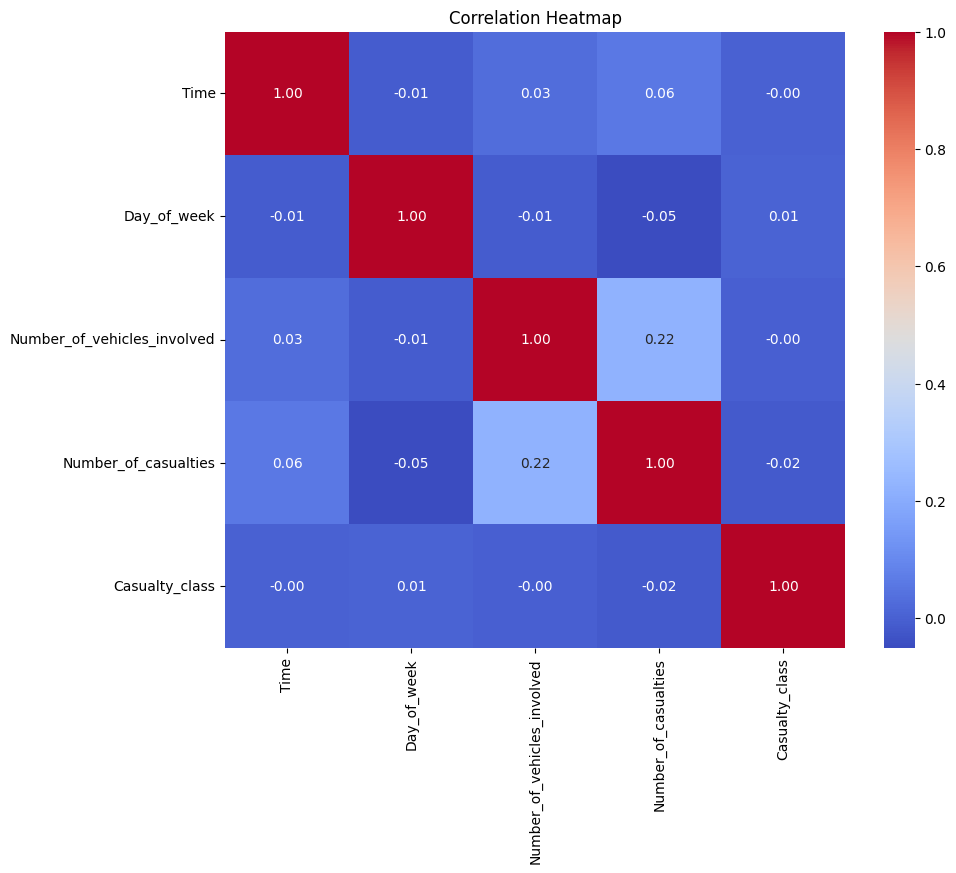

In [154]:
# Correlation heatmap
numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [155]:
df.shape

(8439, 30)

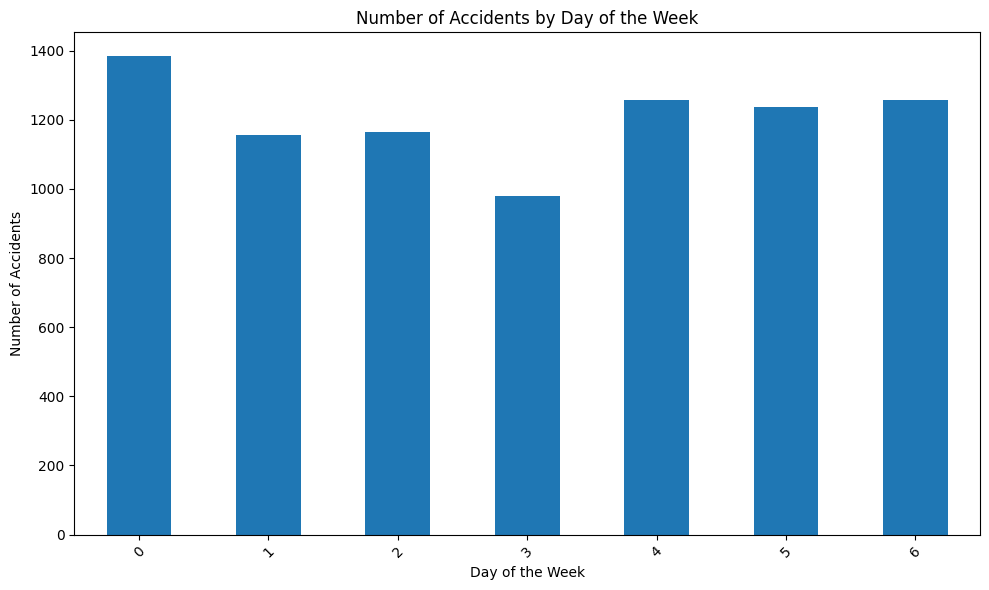

In [156]:

day_counts = df['Day_of_week'].value_counts().sort_index()


plt.figure(figsize=(10, 6))
day_counts.plot(kind='bar')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Accidents')
plt.title('Number of Accidents by Day of the Week')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


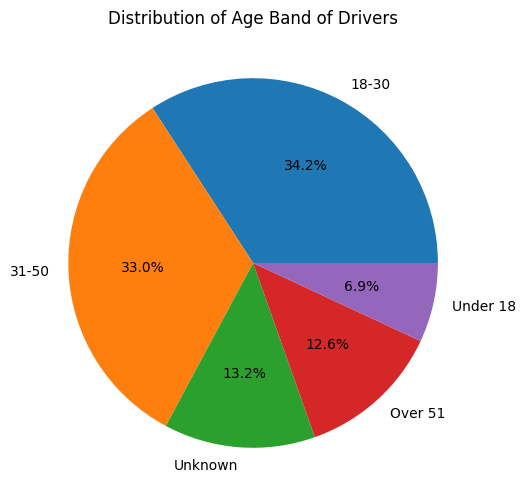

In [157]:

# Pie chart for Age_band_of_driver
plt.figure(figsize=(8, 6))
df['Age_band_of_driver'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Age Band of Drivers')
plt.ylabel('')
plt.show()


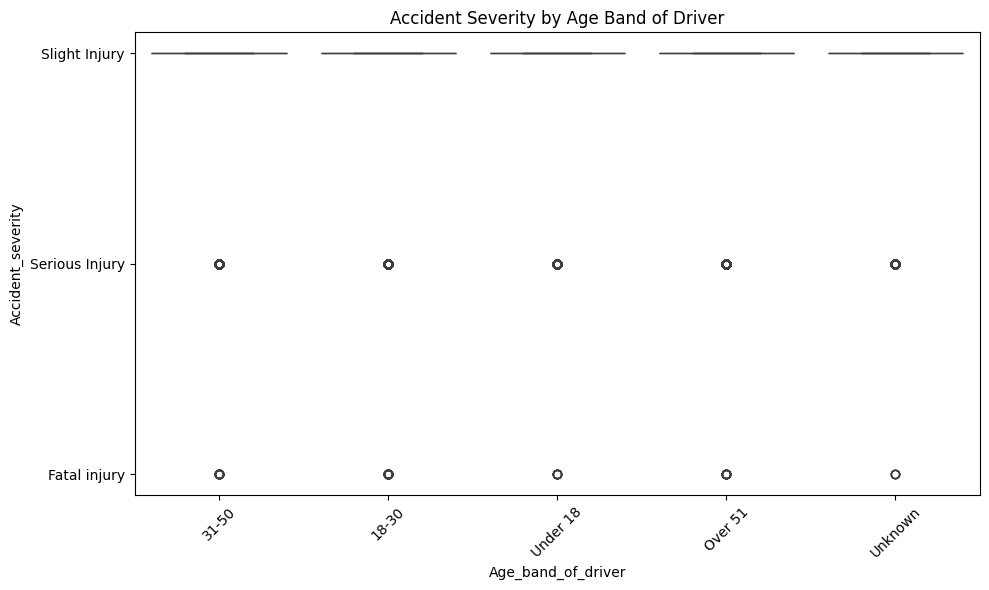

In [158]:

# box plot for 'Age_band_of_driver' vs 'Accident_severity'
plt.figure(figsize=(10, 6))
sns.boxplot(x='Age_band_of_driver', y='Accident_severity', data=df)
plt.title('Accident Severity by Age Band of Driver')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


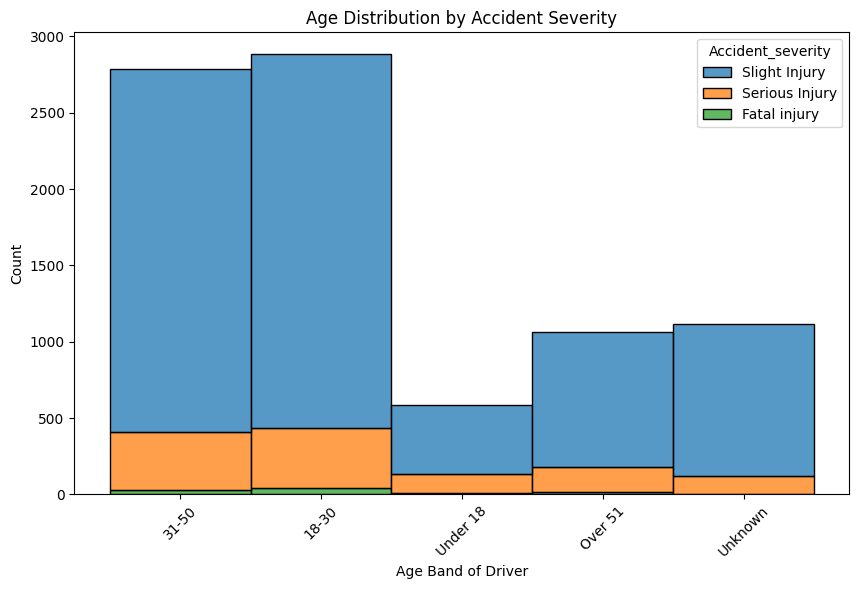

In [159]:


plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age_band_of_driver', hue='Accident_severity', multiple='stack')
plt.title('Age Distribution by Accident Severity')
plt.xlabel('Age Band of Driver')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [160]:
df.columns

Index(['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle',
       'Area_accident_occured', 'Lanes_or_Medians', 'Road_allignment',
       'Types_of_Junction', 'Road_surface_type', 'Road_surface_conditions',
       'Light_conditions', 'Weather_conditions', 'Type_of_collision',
       'Number_of_vehicles_involved', 'Number_of_casualties',
       'Vehicle_movement', 'Casualty_class', 'Sex_of_casualty',
       'Age_band_of_casualty', 'Casualty_severity', 'Work_of_casuality',
       'Pedestrian_movement', 'Cause_of_accident', 'Accident_severity'],
      dtype='object')

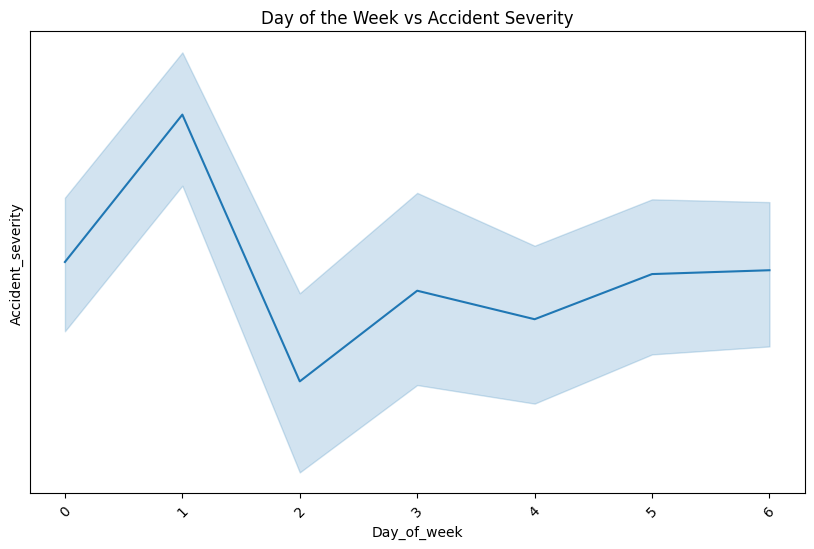

In [161]:

# Lineplot for Day of the Week vs Accident Severity
plt.figure(figsize=(10, 6))
sns.lineplot(x='Day_of_week', y='Accident_severity', data=df)
plt.title('Day of the Week vs Accident Severity')
plt.xticks(rotation=45)
plt.show()


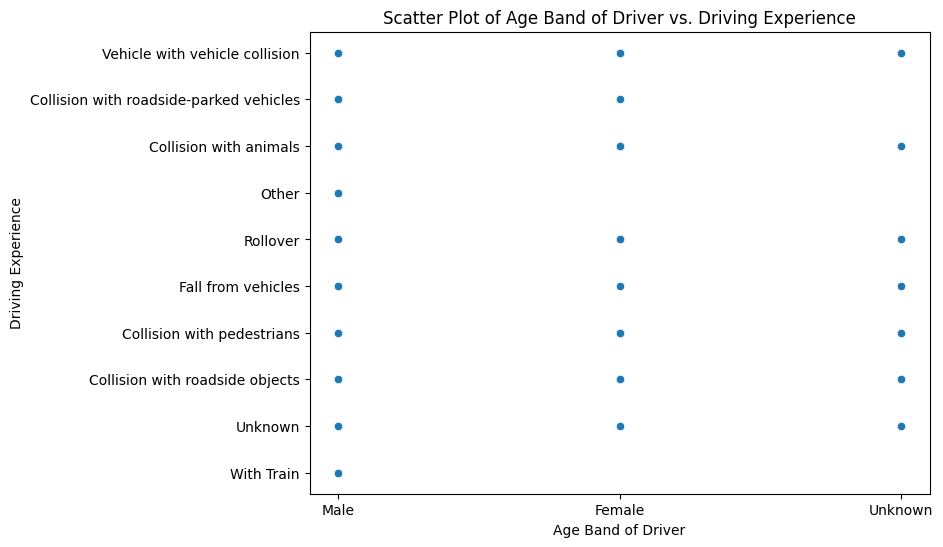

In [162]:
# Sample scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Sex_of_driver', y='Type_of_collision', data=df)
plt.title('Scatter Plot of Age Band of Driver vs. Driving Experience')
plt.xlabel('Age Band of Driver')
plt.ylabel('Driving Experience')
plt.show()


## Feature Selection
- Choose features that you believe will most influence the outcome based on your analysis and the insights from your visualizations. Focus on those that appear most impactful to include in your modeling.

## Train-Test Split
* Divide the dataset into training and testing sets to evaluate the performance of your models.

In [163]:


# Label encode 'Age_band_of_driver' column
df['Age_band_of_driver'] = le.fit_transform(df['Age_band_of_driver'])
df['Sex_of_driver'] = le.fit_transform(df['Sex_of_driver'])
df['Educational_level'] = le.fit_transform(df['Educational_level'])
df['Cause_of_accident'] = le.fit_transform(df['Cause_of_accident'])
#df['Sex_of_driver'] = le.fit_transform(df['Sex_of_driver'])



In [164]:
#
# Age_band_of_driver
# Sex_of_driver
# Educational_level
# Type_of_vehicle
# Cause_of_accident

# Features and target value
features = ['Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
            'Educational_level', 'Cause_of_accident']
target = 'Accident_severity'

X = df[features]
y = df[target]

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [165]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Modeling

Once the data is split into training and testing sets, the next step is to build models to make predictions. Here, we will explore several machine learning algorithms, each with its unique characteristics and suitability for different types of data and problems. You will implement the following models:

### 1. Logistic Regression

### 2. Decision Tree Classifier

### 3. Support Vector Machine (SVM)

### 4. K-Neighbors Classifier

### Implementing the Models
- For each model, use the training data you have prepared to train the model.

#### Logistic Regression

In [166]:



log_reg = LogisticRegression()


log_reg.fit(X_train, y_train)


y_pred = log_reg.predict(X_test)



#### Decision Tree Classifier

In [167]:


dt_clf = DecisionTreeClassifier()


dt_clf.fit(X_train, y_train)


y_pred_dt = dt_clf.predict(X_test)




In [168]:


accuracy_log_reg = accuracy_score(y_test, y_pred)
print("Logistic Regression Accuracy:", accuracy_log_reg)


accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Accuracy:", accuracy_dt)


Logistic Regression Accuracy: 0.8595971563981043
Decision Tree Accuracy: 0.8033175355450237


#### Support Vector Machine (SVM)

In [80]:


svm_clf = SVC()


svm_clf.fit(X_train, y_train)


y_pred_svm = svm_clf.predict(X_test)


accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy:", accuracy_svm)


SVM Accuracy: 0.8595971563981043


#### K-Neighbors Classifier

In [81]:


knn_clf = KNeighborsClassifier()


knn_clf.fit(X_train, y_train)


y_pred_knn = knn_clf.predict(X_test)


accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("K-Nearest Neighbors Accuracy:", accuracy_knn)


K-Nearest Neighbors Accuracy: 0.8240521327014217


## Model Evaluation

After training your models, it's crucial to evaluate their performance to understand their effectiveness and limitations. This section outlines various techniques and metrics to assess the performance of each model you have implemented.

### Evaluation Techniques
1. **Confusion Matrix**

2. **Accuracy**

3. **Precision and Recall**

4. **F1 Score**

5. **ROC Curve and AUC**

### Implementing Evaluation
- Calculate the metrics listed above using your test data.

In [82]:
# --- Logistic Regression ---
# Confusion Matrix
conf_matrix_log_reg = confusion_matrix(y_test, y_pred)
print("---------------------------------------------")
print("Logistic Regression Confusion Matrix:\n", conf_matrix_log_reg)
print("---------------------------------------------")
# Caluclated before
print("Logistic Regression Accuracy:", accuracy_log_reg)

# Precision, Recall, and F1-score
precision_log_reg = precision_score(y_test, y_pred, average='weighted')
recall_log_reg = recall_score(y_test, y_pred, average='weighted')
f1_log_reg = f1_score(y_test, y_pred, average='weighted')
print("Logistic Regression Precision:", precision_log_reg)
print("Logistic Regression Recall:", recall_log_reg)
print("Logistic Regression F1-score:", f1_log_reg)
print("---------------------------------------------")


# Confusion Matrix
print("---------------------------------------------")
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
print("\nDecision Tree Confusion Matrix:\n", conf_matrix_dt)
print("---------------------------------------------")
# Accuracy (already calculated above)
print("Decision Tree Accuracy:", accuracy_dt)

# Precision, Recall, and F1-score
precision_dt = precision_score(y_test, y_pred_dt, average='weighted')
recall_dt = recall_score(y_test, y_pred_dt, average='weighted')
f1_dt = f1_score(y_test, y_pred_dt, average='weighted')
print("Decision Tree Precision:", precision_dt)
print("Decision Tree Recall:", recall_dt)
print("Decision Tree F1-score:", f1_dt)
print("---------------------------------------------")

# Support Vector Machine (SVM)
# Confusion Matrix
print("---------------------------------------------")
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
print("\nSVM Confusion Matrix:\n", conf_matrix_svm)
print("---------------------------------------------")
# caluclated before
print("SVM Accuracy:", accuracy_svm)

# Precision, Recall, and F1-score
precision_svm = precision_score(y_test, y_pred_svm, average='weighted')
recall_svm = recall_score(y_test, y_pred_svm, average='weighted')
f1_svm = f1_score(y_test, y_pred_svm, average='weighted')
print("SVM Precision:", precision_svm)
print("SVM Recall:", recall_svm)
print("SVM F1-score:", f1_svm)

# K-Neighbors Classifier
# Confusion Matrix
print("---------------------------------------------")
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
print("\nK-Nearest Neighbors Confusion Matrix:\n", conf_matrix_knn)
print("---------------------------------------------")
# Accuracy (already calculated above)
print("K-Nearest Neighbors Accuracy:", accuracy_knn)

# Precision, Recall, and F1-score
precision_knn = precision_score(y_test, y_pred_knn, average='weighted')
recall_knn = recall_score(y_test, y_pred_knn, average='weighted')
f1_knn = f1_score(y_test, y_pred_knn, average='weighted')
print("K-Nearest Neighbors Precision:", precision_knn)
print("K-Nearest Neighbors Recall:", recall_knn)
print("K-Nearest Neighbors F1-score:", f1_knn)




---------------------------------------------
Logistic Regression Confusion Matrix:
 [[   0    0   22]
 [   0    0  215]
 [   0    0 1451]]
---------------------------------------------
Logistic Regression Accuracy: 0.8595971563981043
Logistic Regression Precision: 0.7389072712877071
Logistic Regression Recall: 0.8595971563981043
Logistic Regression F1-score: 0.794696064946575
---------------------------------------------
---------------------------------------------

Decision Tree Confusion Matrix:
 [[   0    3   19]
 [   1   12  202]
 [   9   97 1345]]
---------------------------------------------
Decision Tree Accuracy: 0.8039099526066351
Decision Tree Precision: 0.7519342184677614
Decision Tree Recall: 0.8039099526066351
Decision Tree F1-score: 0.7757772516604208
---------------------------------------------
---------------------------------------------

SVM Confusion Matrix:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


 [[   0    0   22]
 [   0    0  215]
 [   0    0 1451]]
---------------------------------------------
SVM Accuracy: 0.8595971563981043
SVM Precision: 0.7389072712877071
SVM Recall: 0.8595971563981043
SVM F1-score: 0.794696064946575
---------------------------------------------

K-Nearest Neighbors Confusion Matrix:
 [[   0    1   21]
 [   0   12  203]
 [   1   71 1379]]
---------------------------------------------
K-Nearest Neighbors Accuracy: 0.8240521327014217
K-Nearest Neighbors Precision: 0.7576744433570941
K-Nearest Neighbors Recall: 0.8240521327014217
K-Nearest Neighbors F1-score: 0.7865068734356139


In [83]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve, auc



label_encoder = LabelEncoder()
y_test_encoded = label_encoder.fit_transform(y_test)


models = [
    ("Logistic Regression", log_reg),
    ("Decision Tree", dt_clf),
    ("K-Nearest Neighbors", knn_clf),
]


for model_name, model in models:
    y_pred_proba = model.predict_proba(X_test)
    for i in range(y_pred_proba.shape[1]):
        fpr, tpr, _ = roc_curve(y_test_encoded, y_pred_proba[:, i], pos_label=i)
        roc_auc = auc(fpr, tpr)
        print(f"{model_name} - ROC AUC for class {label_encoder.classes_[i]}: {roc_auc}")
    print("---------------------------------------------")

Logistic Regression - ROC AUC for class Fatal injury: 0.5302711993888465
Logistic Regression - ROC AUC for class Serious Injury: 0.457225406147871
Logistic Regression - ROC AUC for class Slight Injury: 0.4755093969821482
---------------------------------------------
Decision Tree - ROC AUC for class Fatal injury: 0.46298974135108584
Decision Tree - ROC AUC for class Serious Injury: 0.5346737397180252
Decision Tree - ROC AUC for class Slight Injury: 0.5324975936862981
---------------------------------------------
K-Nearest Neighbors - ROC AUC for class Fatal injury: 0.49984993997599036
K-Nearest Neighbors - ROC AUC for class Serious Injury: 0.5438592336475159
K-Nearest Neighbors - ROC AUC for class Slight Injury: 0.5472015516724971
---------------------------------------------


## Project Questions:

### Comparative Analysis

- **Compare Metrics**: Examine the performance metrics (such as accuracy, precision, and recall) of each model. Document your observations on which model performs best for your dataset and the problem you're addressing.
- **Evaluate Trade-offs**: Discuss the trade-offs you encountered when choosing between models. Consider factors like computational efficiency, ease of implementation, and model interpretability.
- **Justify Your Choice**: After comparing and evaluating, explain why you believe one model is the best choice. Provide a clear rationale based on the performance metrics and trade-offs discussed.
- **Feature Importance**: Identify and discuss the most important features for the best-performing model. How do these features impact the predictions? Use the visualizations you have created to justify your answer if necessary.
- **Model Limitations**: Discuss any limitations you encountered with the models you used. Are there any aspects of the data or the problem that these models do not handle well?
- **Future Improvements**: Suggest potential improvements or further steps you could take to enhance model performance. This could include trying different algorithms, feature engineering techniques, or tuning hyperparameters.

### Answer Here:

1- all models did between 0.7 to 0.8 it is very close and difficult to say definitively which model is "best" the simplest model (logistic regression) performs comparably to more complex models.

2. the complexity of the model vs its interpretability. Simpler models, like logistic regression, is simpler but may not capture complex relationships another trade-off is computational efficiency: more complex models take longer to train.

Feature Importance:It is the most important that could impact the target value. for example, Accident_severity and where he works may not give a good prediction or may not predict the value accurately

3.Given all the models performed similarly, we may take the simplest model which is logistic regression

4.i had to use label encoder in order to train the models with the features of X

Feature work:

Feature Engineering: Create new features or transform existing ones, such as combining features or creating interaction terms.
Hyperparameter Tuning: Use techniques like GridSearchCV to find optimal hyperparameters for each model.

In [84]:
# Compare Metrics: Examine the performance metrics (such as accuracy, precision, and recall) of each model. Document your observations on which model performs best for your dataset and the problem you're addressing.

# All models achieved accuracy scores between 0.7 and 0.8,
# Notably, the simplest model (logistic regression) performs
# comparably to more complex models like Decision Trees and KNN.





In [85]:
# Evaluate Trade-offs:

# Model Complexity vs. Interpretability:
# - Logistic Regression: Simplest, easy to interpret coefficients,
#   but may not capture complex relationships.
# - Decision Tree: More complex, can capture non-linear relationships,
#   but can be harder to interpret with deep trees.

# Computational Efficiency:
# - Logistic Regression: Generally very efficient to train and predict.
# - Decision Tree: Training can be fast, but prediction time can increase
#   with tree depth.

# Ease of Implementation:
# - All three models are relatively easy to implement using libraries


In [86]:

#similar performance across models, Logistic Regression is
# the preferred choice due to its simplicity, ease of
# interpretation, and computational efficiency.
# While other models might capture more complex relationships,
# but it will be more complex


In [87]:

# Future Improvements:
# Feature Engineering:
#  Create new features or transform existing ones, such as combining features or creating interaction terms.

# Hyperparameter Tuning:
# Use techniques like GridSearchCV to find optimal hyperparameters for each model.


In [88]:
#Model Limitations:

# - Limited Feature Set: The models were trained on a limited set of features.
#   Including more relevant features could improve performance.

# - Class Imbalance: If the dataset has a significant class imbalance
#   (some accident severities are much more common than others), the models
#   might be biased towards predicting the majority class.


In [89]:
# Feature Importance: It refers to identifying which features (variables) in your dataset have the most significant impact on predicting the target variable (Accident_severity in this case).

# For example, features like 'Day_of_week', 'Age_band_of_driver', or 'Cause_of_accident' might be more important in predicting accident severity compared to less relevant features.

# Understanding feature importance helps focus on the most influential factors and potentially improve model accuracy by prioritizing those features.


In [90]:

# For example, 'Day_of_week', 'Age_band_of_driver', or 'Cause_of_accident' will be more important in predicting accident severity

# Feature importance is like figuring out which features are important to predict the target value

# For example, if we're trying to guess how the accident was,
# knowing the day of the week, the driver's age, or the cause of the accident , will be more useful
